(ch07)=
# Stress

Geoscientists and engineers are familiar with the concept of stress (other people too). Stress describes the forces per unit area, i.e. the tractions, acting on imaginary planes of varied orientations inside a body. These tractions and the stress occur at a particular instant of time.

(ch07-1)=
## The stress tensor

A traction is defined as a force, **f**, divided by the area of the plane, A, on which it acts:

$$
\mathbf{t}=\frac{\mathbf{f}}{A}
$$ (ch07_eq01)

A force of one Newton acting on one square meter is one Pascal (1 N/ m<sup>2</sup> = 1 Pa). A Pascal is very small, the atmospheric pressure is about $10^5$ Pa. Therefore, we use a more convenient unit called Megapascal (1 MPa = $10^6$ Pa).

In the subsurface, the vertical traction due to the weight of the overburden ($\sigma_v$) is equal to:

$$
\label{eq7.2}
    \sigma_v=\rho g h
$$ (ch07_eq02)

where $\rho$ is the rock density, $g$ is gravity, and $h$ is depth. Rock density increases with depth, but assuming an average rock density of 2400 kg/ m<sup>3</sup>, $\sigma_v$ is about 24 MPa at 1 km depth. 23-25 MPa/km is a reasonable value for the gradient of $\sigma_v$ with depth.

If we now consider a point in space and a Cartesian coordinate system $\mathbf{X_1X_2X_3}$ centered at this point ({numref}`Figure %s <ch07_fig01>`), the components of the stress tensor, $\boldsymbol{\sigma}$, are just the tractions on planes that are perpendicular to the axes of the coordinate system:

$$
\sigma_{ij}=\begin{bmatrix}\sigma_{11}&\sigma_{12}&\sigma_{13}\\\sigma_{21}&\sigma_{22}&\sigma_{23}\\\sigma_{31}&\sigma_{32}&\sigma_{33}\end{bmatrix}
$$ (ch07_eq03)

```{figure} /figures/ch07_fig01.png
:width: 400px
:name: ch07_fig01

The components of the stress tensor are the normal and shear tractions on planes perpendicular to the coordinate axes.
```

For each component, the first index indicates the axis perpendicular to the plane, and the second index the axis to which the traction is parallel ({numref}`Figure %s <ch07_fig01>`). Tractions with equal indices (e.g. $\sigma_{11}$) act perpendicular to the plane and are called normal tractions, while tractions with different indices (e.g. $\sigma_{12}$) act parallel to the plane and are called shear tractions. Because normal tractions are predominantly compressive within the Earth (Eq. {eq}`ch07_eq02`), in geology we consider compressive normal tractions as positive and tensional normal tractions as negative. This is opposite to material science, where tensional normal tractions are considered positive.

From {numref}`Figure %s <ch07_fig01>` it is also clear that if the cube is in equilibrium and it does not rotate about one of the coordinates axis, the stress tensor must be symmetric ($\sigma_{ij}=\sigma_{ji}$).

(ch07-1-1)=
### Cauchy’s law

The stress tensor relates two vectors, the traction on a plane, $\mathbf{t}$, and the pole to the plane, $\mathbf{p}$ ({numref}`Figure %s <ch07_fig02>`). This is nicely expressed by Cauchy’s law (for a proof of this law see Allmendinger et al., 2012):

$$
t_i=\sigma_{ij}p_j
$$ (ch07_eq04)

```{figure} /figures/ch07_fig02.png
:width: 400px
:name: ch07_fig02

Tractions $t_{i}$ on a plane oblique to the coordinate axes. $\textbf{p}$ is the pole to the plane.
```

Notice that $t_i$ are tractions parallel to the axes of the coordinate system and $\mathbf{p}$ is a unit vector defined by its direction cosines with respect to these axes ({numref}`Figure %s <ch07_fig02>`).

The function [cauchy](https://github.com/nfcd/compGeo/blob/master/source/functions/cauchy.py) calculates the tractions $t_i$ on a plane of any orientation in any coordinate system. `cauchy` uses function [dircos_axes](https://github.com/nfcd/compGeo/blob/master/source/functions/dircos_axes.py) which calculates the direction cosines of the $\mathbf{X_1X_2X_3}$ axes. To define the orientation of these axes, it is just necessary to give the trend and plunge of $\mathbf{X_1}$ and the trend of $\mathbf{X_3}$:

In [1]:
import numpy as np

from compgeo.dircos_axes import dircos_axes
from compgeo.sph_to_cart import sph_to_cart
from compgeo.pole import pole_from_plane


def cauchy(stress,tx1,px1,tx3,strike,dip):
    """
    Given the stress tensor in a X1X2X3 coordinate system,
    cauchy computes the X1X2X3 tractions on an arbitrarily
    oriented plane 
    
    USE: t,pt = cauchy(stress,tx1,px1,tx3,strike,dip)
    
    stress = 3 x 3 stress tensor
    tx1 = trend of X1
    px1 = plunge of X1
    tx3 = trend of X3
    strike = strike of plane
    dip = dip of plane
    t = 1 x 3 vector with X1, X2 and X3 tractions
    pt = 1 x 3 vector with direction cosines of pole
        to plane with respect to X1X2X3
    
    NOTE = Plane orientation follows the right hand rule
    Input/Output angles are in radians
    
    Python function translated from the Matlab function
    Cauchy in Allmendinger et al. (2012)
    """
    # Compute direction cosines of X1X2X3 with respect
    # to NED
    dc = dircos_axes(tx1,px1,tx3)
    
    # Calculate direction cosines of pole to plane
    trd, plg = pole_from_plane(strike,dip)
    p = np.zeros(3)
    p[0],p[1],p[2] = sph_to_cart(trd,plg)
    
    # Transform pole to plane to stress coordinates X1X2X3
    # The transformation matrix is the direction cosines of
    # X1X2X3
    pt = np.zeros(3)
    for i in range(3):
        for j in range(3):
            pt[i] = dc[i,j]*p[j] + pt[i]
            
    # Calculate the tractions in stress coordinates X1X2X3
    t = np.zeros(3)
    
    # Compute tractions using Cauchy"s law
    for i in range(3):
        for j in range(3):
            t[i] = stress[i][j]*pt[j] + t[i]
    
    return t, pt


def dircos_axes(tx1,px1,tx3):
    """
    dircos_axes calculates the direction cosines of a right
    handed, orthogonal X1X2X3 cartesian coordinate system
    of any orientation with respect to NED
    
    USE: dc = dircos_axes(tx1,px1,tx3)
    
    tx1 = trend of X1
    px1 = plunge of X1
    tx3 = trend of X3
    dc = 3 x 3 matrix containing the direction cosines
        of X1 (row 1), X2 (row 2), and X3 (row 3)
    
    Note: Input angles should be in radians
    
    Python function translated from the Matlab function
    DirCosAxes in Allmendinger et al. (2012)
    """
    # Some constants
    east = np.pi/2.0
    west = 3.0*east
    # tolerance for near zero values
    tol = 1e-6 
    
    # Initialize matrix of direction cosines
    dc = np.zeros((3,3))
    
    # Direction cosines of X1
    dc[0,0],dc[0,1],dc[0,2] = sph_to_cart(tx1,px1)
    
    # Calculate plunge of axis 3
    # If axis 1 is horizontal
    if abs(px1) < tol:
        dt = abs(tx1-tx3)
        if abs(dt - east) < tol or abs(dt - west) < tol:
            px3 = 0.0
        else:
            px3 = east
    # Else
    else:
        # Since dot product X1 and X3 = 0
        px3 = np.arctan(-(dc[0,0]*np.cos(tx3)
            +dc[0,1]*np.sin(tx3))/dc[0,2])
    
    # Direction cosines of X3
    dc[2,0],dc[2,1],dc[2,2] = sph_to_cart(tx3,px3)
    
    # X2 is the cross product of X3 and X1
    dc[1,:] = np.cross(dc[2,:],dc[0,:])
    
    # Make it a unit vector
    dc[1,:] = dc[1,:]/np.linalg.norm(dc[1,:])
    
    return dc

(ch07-1-2)=
### Stress transformation

If we know the components of the stress tensor in one coordinate system $\mathbf{X_1X_2X_3}$, we can calculate the components of the tensor in another coordinate system $\mathbf{X'_1X'_2X'_3}$ ([Section 6.4](ch06-4)):

$$
\boldsymbol{\sigma '}=\mathbf{a}^{\mathbf{T}}\boldsymbol{\sigma}\mathbf{a}\quad \text{or}\quad \sigma'_{ij}=a_{ik}a_{jl}\sigma_{kl}
$$ (ch07_eq05)

where $\mathbf{a}$ is the transformation matrix between the new and the old coordinate system. The function [transform_stress](https://github.com/nfcd/compGeo/blob/master/source/functions/transform_stress.py) tranforms the stress tensor from one coordinate system to another:

In [2]:
import numpy as np
from compgeo.dircos_axes import dircos_axes


def transform_stress(stress,tx1,px1,tx3,ntx1,npx1,ntx3):
    """
    transform_stress transforms a stress tensor from
    old X1X2X3 to new X1'X2'X3' coordinates
    
    nstress=transform_stress(stress,tx1,px1,tx3,ntx1,npx1,ntx3)
    
    stress = 3 x 3 stress tensor
    tx1 = trend of X1 
    px1 = plunge of X1 
    tx3 = trend of X3
    ntx1 = trend of X1'
    npx1 = plunge of X1'
    ntx3 = trend of X3'
    nstress = 3 x 3 stress tensor in new coordinate system
    
    NOTE: All input angles should be in radians
    
    Python function translated from the Matlab function
    TransformStress in Allmendinger et al. (2012)
    """
    # Direction cosines of axes of old coordinate system
    odc = dircos_axes(tx1,px1,tx3)
    
    # Direction cosines of axes of new coordinate system
    ndc = dircos_axes(ntx1,npx1,ntx3)
    
    # Transformation matrix between old and new
    # coordinate systems
    a = np.zeros((3,3))
    for i in range(3):
        
        for j in range(3):
            
            # Use dot product
            a[i,j] = np.dot(ndc[i,:],odc[j,:])
    
    # Transform stress
    nstress = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    nstress[i,j] = a[i,k] * a[j,l] * stress[k,l] \
                        + nstress[i,j]
    
    return nstress

(ch07-1-3)=
### Principal axes of stress

Since stress is a symmetric tensor, there is one orientation of the coordinate system for which the non-diagonal components of the tensor are zero, and only normal tractions act on the planes perpendicular to the coordinate axes ({numref}`Figure %s <ch07_fig03>`). These normal tractions are the principal stresses: $\sigma_1$ is the maximum, $\sigma_2$ is the intermediate, and $\sigma_3$ is the minimum principal stress.

```{figure} /figures/ch07_fig03.png
:width: 400px
:name: ch07_fig03

Plane oblique to the principal stress coordinate system $\textbf{X_{1}X_{2}X_{3}}$. $\sigma_{1}$, $\sigma_{2}$ and $\sigma_{3}$ are the principal stresses, and $\sigma$ and $\tau$ are the normal and maximum shear tractions on the plane.
```

As we saw in [Section 6.2](ch06-2), finding the principal stresses is an eigenvalue problem. The function [principal_stress](https://github.com/nfcd/compGeo/blob/master/source/functions/principal_stress.py) calculates the principal stresses and their orientations for a given stress tensor in a Cartesian coordinate system of any orientation:

In [3]:
import numpy as np

from compgeo.dircos_axes import dircos_axes
from compgeo.cart_to_sph import cart_to_sph


def principal_stress(stress,tx1,px1,tx3):
    """
    Given the stress tensor in a X1X2X3 coordinate system
    principal_stress calculates the principal stresses and
    their orientations (trend and plunge) 
    
    USE: pstress,dcp = principal_stress(stress,tx1,px1,tx3)
    
    stress = Symmetric 3 x 3 stress tensor
    tx1 = trend of X1
    px1 = plunge of X1
    tx3 = trend of X3
    pstress = 3 x 3 matrix containing the magnitude
        (column 1), trend (column 2), and plunge
        (column 3) of the    maximum (row 1),
        intermediate (row 2), and minimum (row 3)
        principal stresses
    dcp = 3 x 3 matrix with direction cosines of the
        principal stress directions: Max. (row 1),
        Int. (row 2), and Min. (row 3) with respect
        to North-East-Down
    
    NOTE: Input/Output angles are in radians
    
    Python function translated from the Matlab function
    PrincipalStress in Allmendinger et al. (2012)
    """
    # Compute direction cosines of X1X2X3
    dc = dircos_axes(tx1,px1,tx3)
    
    # Initialize pstress
    pstress = np.zeros((3,3))
    
    # Calculate the eigenvalues and eigenvectors
    # of the stress tensor
    D, V = np.linalg.eigh(stress)
    
    # Fill principal stress magnitudes
    pstress[0,0] = D[2] # Maximum principal stress
    pstress[1,0] = D[1] # Interm. principal stress
    pstress[2,0] = D[0] # Minimum principal stress
    
    # The direction cosines of the principal stresses are
    # with respect to the X1X2X3 stress coordinate system,
    # so they need to be transformed to the NED coordinate
    # system
    tv = np.zeros((3,3))
    for i in range(3):
        
        for j in range(3):
            
            for k in range(3):
                tv[j,i] = dc[k,j]*V[k,i] + tv[j,i]
                
    
    # Initialize dcp
    dcp = np.zeros((3,3))
    
    # Direction cosines of principal stresses
    for i in range(0,3):
        
        for j in range(0,3):
            
            dcp[i,j] = tv[j,2-i]
        
        # Avoid precision issues
        # Make sure the principal axes are unit vectors
        dcp[i,:] = dcp[i,:]/np.linalg.norm(dcp[i,:])
    
    # Trend and plunge of principal stresses
    for i in range(0,3):
        pstress[i,1],pstress[i,2] = cart_to_sph(dcp[i,0],
            dcp[i,1],dcp[i,2])
    
    return pstress,dcp

If we know the principal stresses, and the direction cosines of the pole to the plane $\mathbf{p}$ with respect to them ({numref}`Figure %s <ch07_fig03>`), it is possible to compute the normal, $\sigma$, and maximum shear, $\tau$, tractions acting on the plane (Ramsay, 1967):

$$
\begin{gathered}
    \sigma=\sigma_{1} l^{2}+\sigma_{2} m^{2}+\sigma_{3} n^{2} \\
    \tau^{2}=\left(\sigma_{1}-\sigma_{2}\right)^{2} l^{2} m^{2}+\left(\sigma_{2}-\sigma_{3}\right)^{2} m^{2} n^{2}+\left(\sigma_{3}-\sigma_{1}\right)^{2} n^{2} l^{2}
\end{gathered}
$$ (ch07_eq06)

where $l$, $m$ and $n$ are the direction cosines of $\mathbf{p}$ with respect to $\sigma_1$, $\sigma_2$ and $\sigma_3$, respectively. Notice that this equation just tells us about the magnitude of the maximum shear traction. It does not say anything about the direction and sense of it. In [Section 7.4.1](ch07-4-1), we will see a more comprehensive way to solve this problem.

Let’s use the functions introduced so far to solve the following problem: The maximum, intermediate and minimum principal stresses are 40, 30, and 20 MPa, respectively. $\sigma_1$ is vertical and $\sigma_3$ is horizontal and trends N-S:

1. Compute the tractions parallel to the principal stress directions, acting on a plane with orientation 040/65 (RHR).

2. Compute the normal and maximum shear tractions acting on the plane.

3. Compute the stress tensor on a new coordinate system with $\mathbf{X_1}$ 030/45 and $\mathbf{X_3}$ trending 210.

4. Demonstrate that these new components represent still the same tensor, by computing the principal stresses from the new components.

The notebook [ch7-1](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch7-1.ipynb) shows the solution to this problem:

In [4]:
# Import libraries
import numpy as np
pi = np.pi

# Import Cauchy, TransformStress and PrincipalStress
from compgeo.cauchy import cauchy 
from compgeo.transform_stress import transform_stress
from compgeo.principal_stress import principal_stress

# Stress tensor in principal stress coordinate system
stress = np.array([[40, 0, 0],[ 0, 30, 0],[ 0, 0, 20]])

# trend and plunge of X1, and trend of X3
tx1, px1, tx3 = np.radians([0, 90, 0])

# plane orientation
strike, dip = np.radians([40, 65])

# X1, X2 and X3 tractions on the plane
t,pt = cauchy(stress,tx1,px1,tx3,strike,dip)
print("X1, X2 and X3 tractions = ", t.round(3),"\n")

# Compute the normal and maximum shear tractions 
# on the plane: Eq. 7.6
l2 = pt[0]**2
m2 = pt[1]**2
n2 = pt[2]**2
s1 = stress[0,0]
s2 = stress[1,1]
s3 = stress[2,2]
s12 = s1 - s2
s23 = s2 - s3
s31 = s3 - s1
sigma = s1*l2 + s2*m2 + s3*n2
tau = np.sqrt(s12*s12*l2*m2 + s23*s23*m2*n2 + s31*s31*n2*l2)
print("Sigma = {:.3f}, Tau = {:.3f}\n".format(sigma,tau))

# New coordinate system
# trend and plunge of X"1,and trend of X"3
ntx1, npx1, ntx3 = np.radians([30, 45, 210])

# Transform stress to new coordinate system
nstress = transform_stress(stress,tx1,px1,tx3,ntx1,npx1,ntx3)
print("Stress in new coord. system = \n", 
      nstress.round(3),"\n")

# Principal stresses from new components
pstress, dcp = principal_stress(nstress,ntx1,npx1,ntx3)
pstress[:,1:3] = pstress[:,1:3]*180/pi

print("Sigma1 = {:.3f}, Trend = {:.1f}, Plunge = {:.1f}"
      .format(pstress[0,0],pstress[0,1],pstress[0,2]))

print("Sigma2 = {:.3f}, Trend = {:.1f}, Plunge = {:.1f}"
      .format(pstress[1,0],pstress[1,1],pstress[1,2]))

print("Sigma3 = {:.3f}, Trend = {:.1f}, Plunge = {:.1f}"
      .format(pstress[2,0],pstress[2,1],pstress[2,2]))

X1, X2 and X3 tractions =  [16.905 20.828 11.651] 

Sigma = 28.392, Tau = 7.015

Stress in new coord. system = 
 [[31.25   3.062  8.75 ]
 [ 3.062 27.5   -3.062]
 [ 8.75  -3.062 31.25 ]] 

Sigma1 = 40.000, Trend = 143.1, Plunge = -90.0
Sigma2 = 30.000, Trend = 270.0, Plunge = -0.0
Sigma3 = 20.000, Trend = 180.0, Plunge = 0.0


The principal stresses computed from the new components of the stress tensor are the same as the input principal stresses. Try changing the orientations of the principal stresses in the notebook (e.g. `tx1` = 45, `px1` = 0). Check how the results change. This is a great way to understand the concepts introduced so far.

(ch07-2)=
## Mohr circle for stress

As discussed in [Section 6.4.1](ch06-4-1), the Mohr circle is derived by making a rotation about one of the principal axes of a symmetric tensor. In the case of stress, the rotation is about one of the principal stresses. In {numref}`Figure %s <ch07_fig04>`a, the old axes are parallel to the principal axes of the stress tensor, and the rotation is about the $\mathbf{X_2}$ ($\sigma_2$) axis. If the amount of rotation $\theta$ is such that the new $\mathbf{X'_1}$ axis is parallel to the normal to the plane $\mathbf{n}$ ({numref}`Figure %s <ch07_fig04>`b), the components $\sigma '_{11}$ and $\sigma '_{13}$ are the normal ($\sigma$) and shear ($\tau$) tractions on the plane, respectively. These tractions are given by:

$$
\begin{gathered}
	\sigma=\frac{\sigma_1+\sigma_3}{2}+\frac{\sigma_1-\sigma_3}{2}\cos2\theta \\
	\tau=\frac{\sigma_1-\sigma_3}{2}\sin2\theta
\end{gathered}
$$ (ch07_eq07)

which are similar to Eq. {eq}`ch06_eq14` and define the Mohr circle for stress.

:::{note}
The sign change in the equation for $\tau$ is due to our convention of considering compressional tractions as positive.
:::

```{figure} /figures/ch07_fig04.png
:width: 650px
:name: ch07_fig04

Rotation of the stress tensor about $\mathbf{X_2}$. **a.** The old coordinate system is parallel to the principal axes of the tensor. **b.** In the new coordinate system $\mathbf{X'_1}$ is parallel to the normal to the plane of interest. Modified from Allmendinger et al. (2012).
```

The horizontal axis of the Mohr circle for stress is $\sigma$ and the vertical axis is $\tau$. $\sigma$ is positive if compressional, and $\tau$ is positive if the sense of shear is anticlockwise (e.g. {numref}`Figure %s <ch07_fig04>`b). The x coordinate of the center, $C$, of the Mohr circle is $(\sigma_1+\sigma_3)/2$, and the radius, $r$, is $(\sigma_1-\sigma_3)/2$ ({numref}`Figure %s <ch07_fig05>`).

```{figure} /figures/ch07_fig05.png
:width: 600px
:name: ch07_fig05

Mohr circle for stress for the situation shown in Fig. 7.4. The normal and shear tractions on the plane (point $P$) can be found by either measuring $2\theta$ from $\sigma_{1}$ or by tracing the plane from the pole of planes $O_{P}$.
```

If the normal to the plane makes an angle $\theta$ with respect to $\sigma_1$ ({numref}`Figure %s <ch07_fig04>`), the normal and shear tractions on the plane can be found by drawing in the Mohr circle a radius $CP$ at an angle $2\theta$ with respect to $\sigma_1$ ({numref}`Figure %s <ch07_fig05>`). The coordinates of point $P$ are the normal and shear tractions on the plane.

If we draw lines from $\sigma_1$ and $\sigma_3$ parallel to the planes on which these tractions act, the lines will intersect at a point $O_P$ ({numref}`Figure %s <ch07_fig05>`). This point is known as the pole for planes (Ragan, 2009) and it has a very useful property: A line drawn from $O_P$ to any point $P$ on the Mohr circle circumference is parallel to the plane on which the tractions given by $P$ act ({numref}`Figure %s <ch07_fig05>`). Thus, from $O_P$, we can rapidly find out the tractions on any plane parallel to $\sigma_2$.

Notice that we can rotate the stress tensor about anyone of the three principal axes. Thus in 3D, the Mohr circle for stress consists of three circles, each one describing the rotation about one of the principal stresses. In [Section 7.4.2](ch07-4-2) we will see how to plot the Mohr circle for stress in 3D.

(ch07-2-1)=
### Special states of stress

There are some special states of stress that can be illustrated with the Mohr circle:

- Biaxial stress: Two of the principal stresses are non-zero and are different ({numref}`Figure %s <ch07_fig06>`a).

- Triaxial stress: This is the most general type of stress. It has three non-zero, different principal stresses ({numref}`Figure %s <ch07_fig06>`b).

- Cylindrical stress: When two of the principal stresses are equal and the third is different ({numref}`Figure %s <ch07_fig06>`c). If the two equal principal stresses are zero, the stress is known as uniaxial.

- Hydrostatic stress: All three principal stresses have the same value ({numref}`Figure %s <ch07_fig06>`d). In this case, any direction is a principal axis (the stress tensor is a sphere), and there are no shear tractions on the body. This condition is typical of static fluids.

- Pure shear stress: Two of the principal stresses are equal in magnitude but opposite in sign (one is compressional and the other is tensional), and the third is zero ({numref}`Figure %s <ch07_fig06>`e).

```{figure} /figures/ch07_fig06.png
:width: 600px
:name: ch07_fig06

Mohr circle for several special states of stress. **a.** Biaxial, **b.** Triaxial, **c.** Cylindrical uniaxial, **d.** Hydrostatic, **e.** Pure shear. Modified from Allmendinger et al. (2012).
```

(ch07-3)=
## Mean and deviatoric stress

The special states of stress above allow us to introduce two fundamental types of stress tensors, the mean stress and the deviatoric stress. The mean traction is the average of the three normal tractions (the elements in the diagonal of the stress tensor):

$$
\sigma_m=\frac{\sigma_{11}+\sigma_{22}+\sigma_{33}}{3}
$$ (ch07_eq08)

Notice that the mean traction is the same regardless of the coordinate system because the sum of the normal tractions is the first invariant of the stress tensor ([Section 6.2](ch06-2)). Knowing the mean traction, we can express the stress tensor as the sum of two tensors:

$$
\sigma_{ij}=\left[\begin{array}{ccc}\sigma_m & 0 & 0 \\ 0 & \sigma_m & 0 \\ 0 & 0 & \sigma_m\end{array}\right]+\left[\begin{array}{ccc}\sigma_{11}-\sigma_m & \sigma_{12} & \sigma_{13} \\ \sigma_{21} & \sigma_{22}-\sigma_m & \sigma_{23} \\ \sigma_{31} & \sigma_{32} & \sigma_{33}-\sigma_m\end{array}\right]
$$ (ch07_eq09)

The tensor on the left is the mean stress. It is a hydrostatic state of stress that may cause a body to shrink or expand but, on first glance, it is difficult to see how it would change the shape of the body, unless the body is heterogeneous in strength. The tensor on the right is the deviatoric stress. It is the part of the stress tensor that causes distortion of the body. For a cylindrical state of stress ({numref}`Figure %s <ch07_fig06>`c), it is easy to visualize these tensors. The mean stress is represented by the center of the Mohr circle, while the deviatoric stress is represented by the same circle but centered at the origin.

(ch07-4)=
## Applications

In this section we will look at a problem involving stress, namely calculating the magnitude and orientation of the normal and maximum shear tractions on a plane. This problem is crucial to any question involving faulting and fracturing in the upper crust. We will also use the proposed solution to draw the Mohr circle for stress in 3D.

(ch07-4-1)=
### Normal and shear tractions on a plane

{numref}`Figure %s <ch07_fig07>` illustrates the problem. We want to determine the normal and maximum shear tractions on a plane of any orientation, under a stress tensor with principal axes of any orientation. There are three coordinate systems involved: 1. The geographic coordinate system $\mathbf{NED}$ where the data are input and the results are output, 2. The principal stress coordinate system which is defined by the orientation of the principal stresses $\sigma_1$, $\sigma_2$ and $\sigma_3$, and 3. A coordinate system defined by the fault plane, with the pole to the plane, $\mathbf{p}$, as the first axis, the line of zero shear traction on the fault plane, $\mathbf{b}$, as the second axis, and the line of maximum shear traction on the fault plane, $\mathbf{s}$, as the third axis.

```{figure} /figures/ch07_fig07.png
:width: 400px
:name: ch07_fig07

Lower hemisphere, equal area stereonet illustrating the three coordinate systems involved in determining the maximum shear traction on a fault plane with pole **p**. These coordinate systems are: **NED**, $\sigma_{1}\sigma_{2}\sigma_{3}, and **pbs**. **b** and **s** are the directions of zero and maximum shear traction, respectively. Modified from Allmendinger et al. (2012).
```

The solution to this problem consists of the following steps:

1. Transform the stress tensor to principal stress coordinates. Here we can use the function `principal_stress`.

2. Transform the pole to the plane $\mathbf{p}$ to principal stress coordinates.

3. Compute the traction vector $\mathbf{t}$ ({numref}`Figure %s <ch07_fig07>`) in principal stress coordinates using Cauchy’s law (Eq. {eq}`ch07_eq04`).

4. $\mathbf{p}$, $\mathbf{t}$ and the maximum shear traction $\mathbf{s}$ fall along the same plane ({numref}`Figure %s <ch07_fig07>`). This plane is known as the *movement plane* (Marshak and Mitra, 1988). The pole to the movement plane is the line of zero shear traction $\mathbf{b}$. Therefore, we can calculate $\mathbf{b}$ by the cross product of $\mathbf{t}$ and $\mathbf{p}$, and $\mathbf{s}$ by the cross product of $\mathbf{p}$ and $\mathbf{b}$.

5. Make a transformation matrix $\mathbf{a}$ between the principal stress coordinates and the fault plane coordinates. This matrix has as the first row $\mathbf{p}$, the second row $\mathbf{b}$, and the third row $\mathbf{s}$.

6. Transform the stress tensor from principal stress coordinates to fault plane coordinates. For the transformed tensor, $\mathbf{X'_1}$  is the pole to the plane $\mathbf{p}$, and $\mathbf{X'_3}$ is the direction of the maximum shear traction $\mathbf{s}$. Therefore, $\sigma'_{11}$ is the normal traction on the plane, and $\sigma'_{13}$ is the maximum shear traction on the plane.

7. Transform $\mathbf{p}$, $\mathbf{b}$ and $\mathbf{s}$ from principal stress coordinates to $\mathbf{NED}$ coordinates and find their orientations (trend and plunge).

The function [shear_on_plane](https://github.com/nfcd/compGeo/blob/master/source/functions/shear_on_plane.py) follows these steps and computes the normal and maximum shear tractions on a plane of any orientation, and under a stress tensor of any orientation:

In [5]:
import numpy as np

from compgeo.principal_stress import principal_stress
from compgeo.sph_to_cart import sph_to_cart
from compgeo.cart_to_sph import cart_to_sph
from compgeo.pole import pole_from_plane


def shear_on_plane(stress,tx1,px1,tx3,strike,dip):
    """
    shear_on_plane calculates the direction and magnitudes of
    the normal and maximum shear tractions on an arbitrarily
    oriented plane
    
    tt,dctt,srat=shear_on_plane(stress,tx1,px1,tx3,strike,dip)
    
    stress = 3 x 3 stress tensor
    tx1 = trend of X1
    px1 = plunge of X1
    tx3 = trend of X3
    strike = strike of plane
    dip = dip of plane
    tt = 3 x 3 matrix with the magnitude (column 1),
        trend (column 2) and plunge (column 3) of the:
        normal traction on the plane (row 1), zero shear
        traction (row 2), and max. shear traction (row 3)
    dctt = 3 x 3 matrix with the direction cosines of unit
        vectors parallel to: normal traction on the plane
        (row 1), zero shear traction (row 2), and maximum
        shear traction (row 3) with respect to NED
    srat = stress ratio
    
    NOTE = Input stress tensor does not need to be along
        principal stress directions
        Plane orientation follows the right hand rule
        Input/Output angles are in radians
    
    Python function translated from the Matlab function
    shear_on_plane in Allmendinger et al. (2012)
    """
    # Compute principal stresses and their orientations
    pstress, dcp = principal_stress(stress,tx1,px1,tx3)
    
    # Update stress tensor to principal stress directions
    stress = np.zeros((3,3))
    for i in range(3):
        stress[i,i] = pstress[i,0]
    
    # Calculate stress ratio
    srat = (stress[1,1]-stress[0,0])/(stress[2,2]-stress[0,0])
    
    # Calculate direction cosines of pole to plane
    trd, plg = pole_from_plane(strike,dip)
    p = np.zeros(3)
    p[0], p[1], p[2] = sph_to_cart(trd,plg)
    
    # transform pole to plane to  principal stress coordinates
    pt = np.zeros(3)
    for i in range(3):
        for j in range(3):
            pt[i] = dcp[i,j]*p[j] + pt[i]
    
    # Calculate the tractions in principal stress coordinates
    t = np.zeros(3)
    # Compute tractions using Cauchy's law
    for i in range(3):
        for j in range(3):
            t[i] = stress[i,j]*pt[j] + t[i]
    
    # Find the b axis by the cross product of t and pt
    b = np.cross(t,pt)
    
    # Find the max. shear traction orientation
    # by the cross product of pt and b
    s = np.cross(pt,b)
    
    # Convert b and s to unit vectors
    b = b/np.linalg.norm(b)
    s = s/np.linalg.norm(s)
    
    # Now we can write the transformation matrix from
    # principal stress coordinates to plane coordinates
    a = np.zeros((3,3))
    a[0,:] = pt
    a[1,:] = b
    a[2,:] = s
    
    # Transform stress from principal to plane coordinates
    # Do it only for the first row since we are just
    # interested in the plane: sigma'11 = normal traction,
    # sigma'12 = zero, and sigma'13 = max. shear traction
    tt = np.zeros((3,3))
    for i in range(3):
        tt[i,0] = stress[0,0]*a[0,0]*a[i,0] \
        + stress[1,1]*a[0,1]*a[i,1] + stress[2,2]*a[0,2]*a[i,2]
    
    # Transform normal traction, zero shear
    # and max. shear traction to NED coords
    dctt = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            dctt[0,i] = dcp[j,i]*pt[j] + dctt[0,i]
            dctt[1,i] = dcp[j,i]*b[j] + dctt[1,i]
            dctt[2,i] = dcp[j,i]*s[j] + dctt[2,i]
    
    # Compute trend and plunge of normal traction,
    # zero shear, and max. shear traction on plane
    for i in range(3):
        tt[i,1],tt[i,2] = cart_to_sph(dctt[i,0],
            dctt[i,1],dctt[i,2])
    
    return tt, dctt, srat

The function `shear_on_plane` also computes an important parameter called the principal stress ratio, $R$ (`srat` in the function):

$$
R=\frac{(\sigma_2-\sigma_1)}{(\sigma_3-\sigma_1)}
$$ (ch07_eq10)

when $R$ is 1, $\sigma_2$ is equal to $\sigma_3$; when $R$ is 0, $\sigma_2$ is equal to $\sigma_1$. This ratio is of key importance for predicting faulting and fracturing in the crust (Gephart, 1990; Morris and Ferrill, 2009). Let’s look at the influence of this parameter for the case illustrated in {numref}`Figure %s <ch07_fig07>`. Let’s assume $\sigma_1 = 50$ MPa and $\sigma_3 = 10$ MPa, and let’s vary $\sigma_2$ between $\sigma_3$ ($R=1$) and $\sigma_1$ ($R=0$). The notebook [ch7-2](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch7-2.ipynb) shows the solution to this problem:

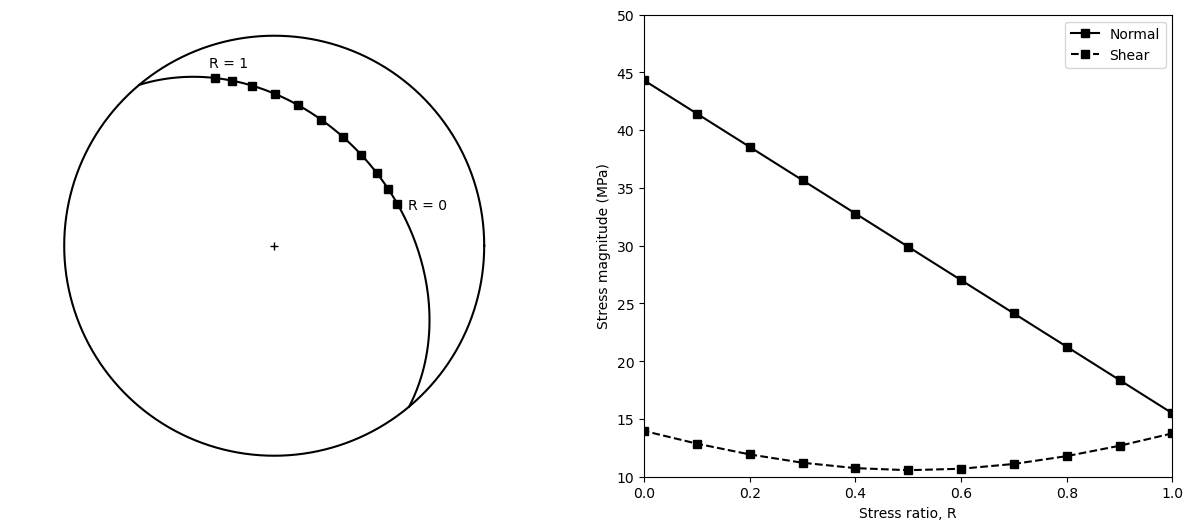

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import functions
from compgeo.shear_on_plane import shear_on_plane
from compgeo.great_circle import great_circle
from compgeo.st_coord_line import st_coord_line

# Stress tensor in principal stress coordinate system
# start with R = 1, sigma2 = sigma3
stress = np.array([[50, 0, 0],[ 0, 10, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([325, 33, 66])

# Plane orientation
strike, dip = np.radians([320, 40])

# Number of R increments
rinc = 11

# sigma2 increment
sstep = (stress[0,0] - stress[2,2])/(rinc-1)

# Initialize array
nort = np.zeros(rinc) # normal tractions
sht = np.zeros(rinc) # max. shear traction
tsht = np.zeros(rinc) # trend max. shear traction
psht = np.zeros(rinc) # plunge max. shear traction
rval = np.zeros(rinc) # R value

# Compute normal and shear tractions for all Rs
for i in range(0,rinc):
    stress[1,1] = stress[2,2] + sstep*i
    
    # Compute normal and maximum shear tractions on plane
    tt,dctt,srat = shear_on_plane(stress,tx1,px1,
                                  tx3,strike,dip)
    # Extract values
    nort[i] = tt[0,0]
    sht[i] = tt[2,0]
    tsht[i] = tt[2,1]
    psht[i] = tt[2,2]
    rval[i] = srat

# Make a larger figure
fig, ax = plt.subplots(1,2,figsize=(15,6))
    
# Plot fault plane and max. shear tractions
# orientations in a lower hemisphere, equal 
# area stereonet

# Plot the primitive of the stereonet
r = 1; # unit radius
th = np.arange(0,361,1)*pi/180
x = r * np.cos(th)
y = r * np.sin(th)
ax[0].plot(x,y,"k")

# Plot center of circle
ax[0].plot(0,0,"k+")

# Make axes equal and remove them
ax[0].axis("equal")
ax[0].axis("off")

# Plot fault plane
path = great_circle(strike,dip,1)
ax[0].plot(path[:,0], path[:,1], "k") 

# Plot max. shear tractions orientations 
for i in range(0,rinc):
    x, y = st_coord_line(tsht[i],psht[i],1)
    ax[0].plot(x,y,"ks")
    if i == 0:
        ax[0].text(x-0.025, y+0.05, "R = 1")
    if i == rinc-1:
        ax[0].text(x+0.05, y-0.025, "R = 0")
    
# Plot normal and shear tractions versus R
ax[1].plot(rval,nort,"k-s", label="Normal")
ax[1].plot(rval,sht,"k--s", label="Shear")
ax[1].axis([0, 1, 10, 50])
ax[1].set_xlabel("Stress ratio, R")
ax[1].set_ylabel("Stress magnitude (MPa)")
ax[1].legend()

plt.show()

This is Figure 6.9 of Allmendinger et al. (2012). The stereonet shows the fault plane and the maximum shear traction for $R=0$ to $1$. The graph to the right shows the variation of the normal and shear tractions with $R$. Notice that $R=0.5$ gives the lowest shear traction. In one of the exercises of [Section 7.5](ch07-5), you will explore more the significance of the principal stress ratio.

(ch07-4-2)=
### The Mohr circle for stress in 3D

We can also use the solution above to draw a Mohr circle for stress in 3D. Here is important to determine the sense of the maximum shear traction. According to our convention, anticlockwise shear is positive, and clockwise shear is negative. The function [mohr_circle_stress](https://github.com/nfcd/compGeo/blob/master/source/functions/mohr_circle_stress.py) draws the Mohr circle in 3D for a given stress tensor and stress coordinate system. It also plots and outputs the normal and maximum shear tractions on a group of input planes.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from compgeo.principal_stress import principal_stress
from compgeo.sph_to_cart import sph_to_cart
from compgeo.cart_to_sph import cart_to_sph
from compgeo.pole import pole_from_plane


def mohr_circle_stress(stress,tx1,px1,tx3,planes):
    """
    Given the stress tensor in a X1X2X3 coordinate system,
    and a group of n planes, mohr_circle_stress draws the Mohr
    Circle for stress (including the planes). It
    also returns the normal and max. shear tractions on the
    planes and their orientations
    
    ns,ons,fig,ax=mohr_circle_stress(stress,tx1,px1,tx3,planes)
    
    stress = 3 x 3 stress tensor
    tx1 = trend of X1
    px1 = plunge of X1
    tx3 = trend of X3
    planes =  n x 2 vector with strike and dip of planes
    ns = n x 2 vector with the normal and max. shear
        tractions on the planes
    ons = n x 4 vector with the trend and plunge of the
        normal traction (columns 1 and 2), and the
        max. shear traction (columns 3 and 4)
        
    fig and ax are handles to the figure and axes
    
    NOTE = Planes orientation follows the right hand rule
        Input and output angles are in radians
    """
    # tolerance for near zero values
    tol = 1e-6
    
    # Compute principal stresses and their orientations
    pstress, dcp = principal_stress(stress,tx1,px1,tx3)
    
    # Update stress tensor to principal stresses
    stress = np.zeros((3,3))
    for i in range(0,3):
        stress[i,i] = pstress[i,0]
    
    # Make figure
    fig, ax = plt.subplots()
    
    # Draw sigma1-sigma3 circle
    c = (stress[0,0] + stress[2,2])/2.0
    r = (stress[0,0] - stress[2,2])/2.0
    th =np.arange(0,2*np.pi,np.pi/50)
    costh = np.cos(th)
    sinth = np.sin(th)
    x = r * costh + c
    y = r * sinth
    ax.plot(x,y,"k-")
    
    # Draw sigma1-sigma2 circle
    c = (stress[0,0] + stress[1,1])/2.0
    r = (stress[0,0] - stress[1,1])/2.0
    x = r * costh + c
    y = r * sinth
    ax.plot(x,y,"k-")
    
    # Draw sigma2-sigma3 circle
    c = (stress[1,1] + stress[2,2])/2.0
    r = (stress[1,1] - stress[2,2])/2.0
    x = r * costh + c
    y = r * sinth
    ax.plot(x,y,"k-")
    
    # Initialize pole to plane
    p = np.zeros(3)
    
    # Initialize vectors with normal and
    # max. shear tractions
    ns = np.zeros((np.size(planes,0),2))
    ons = np.zeros((np.size(planes,0),4))
    
    # Compute normal and max. shear tractions
    for i in range(np.size(planes,0)):
        
        # Calculate direction cosines of pole to plane
        trd, plg = pole_from_plane(planes[i,0],planes[i,1])
        p[0],p[1],p[2] = sph_to_cart(trd, plg)
        
        # trend and plunge of pole = dir. normal traction
        ons[i,0],ons[i,1] = trd, plg
        
        # transform pole to  principal stress coordinates
        pt = np.zeros(3)
        for j in range(3):
            for k in range(3):
                pt[j] = dcp[j,k]*p[k] + pt[j]
        
        # Calculate the tractions in principal stress
        # coordinates
        t = np.zeros(3)
        for j in range(3):
            for k in range(3):
                t[j] = stress[j,k]*pt[k] + t[j]
        
        # Find the b and s axes
        b = np.cross(t,pt)
        s = np.cross(pt,b)
        b = b/np.linalg.norm(b)
        s = s/np.linalg.norm(s)
    
        # Transformation matrix from principal
        # stress coordinates to plane coordinates
        a = np.zeros((3,3))
        a[0,:] = pt
        a[1,:] = b
        a[2,:] = s
        
        # normal and max. shear tractions
        ns[i,0] = stress[0,0]*a[0,0]*a[0,0] + stress[1,1]\
            *a[0,1]*a[0,1]+ stress[2,2]*a[0,2]*a[0,2]
        ns[i,1] = stress[0,0]*a[0,0]*a[2,0] + stress[1,1]\
            *a[0,1]*a[2,1]+ stress[2,2]*a[0,2]*a[2,2]
        
        # Calculate direction cosines of max.
        # shear traction with respect to NED
        ds = np.zeros(3)
        for j in range(3):
            for k in range(3):
                ds[j] = dcp[k,j]*s[k] + ds[j]
        
        # trend and plunge of max. shear traction
        ons[i,2],ons[i,3] = cart_to_sph(ds[0],ds[1],ds[2])
        
        # Cross product of pole and max. shear traction
        ps = np.cross(p,ds)
        
        # Make clockwise shear traction negative
        if np.abs(ps[2]) < tol: # Dip slip
            if ds[2] > 0.0: # Normal slip
                if pt[0]*pt[2] < 0.0:
                    ns[i,1] *= -1.0
            else:   # Reverse slip
                if pt[0]*pt[2] >= 0.0:
                    ns[i,1] *= -1.0
        else:   # Oblique slip
            if ps[2] < 0.0:
                ns[i,1] *= -1.0
    
    # Plot planes
    ax.plot(ns[:,0],ns[:,1],"ks")
    
    # Make axes equal and plot grid
    ax.axis ("equal")
    ax.grid()
    
    # Move x-axis to center and y-axis to origin
    ax.spines["bottom"].set_position("center")
    ax.spines["left"].set_position("zero")
    
    # Eliminate upper and right axes
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    
    # Add labels at end of axes
    ax.set_xlabel(r"$\sigma$",x=1)
    ax.set_ylabel(r"$\tau$",y=1,rotation=0)
    
    return ns, ons, fig, ax

Let’s use this function to solve the following problem: $\sigma_1$, $\sigma_2$, and $\sigma_3$ are 50, 30, and 10 MPa, respectively. $\sigma_1$ is horizontal and trends E-W, while $\sigma_3$ is vertical. Plot on the Mohr circle the tractions on the following planes (RHR): 000/30, 000/45, 000/60, 180/30, 180/45, 180/60, 045/30, 045/45, 045/60, 135/30, 135/45 and 135/60. The notebook [ch7-3](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch7-3.ipynb) shows the solution to this problem:

Strike	Dip	σ	Trend	Plunge	τ	Trend	Plunge
0.0	30.0	20.00	270.0	60.0	17.32	270.0	-30.0
0.0	45.0	30.00	270.0	45.0	20.00	270.0	-45.0
0.0	60.0	40.00	270.0	30.0	17.32	270.0	-60.0
180.0	30.0	20.00	90.0	60.0	-17.32	90.0	-30.0
180.0	45.0	30.00	90.0	45.0	-20.00	90.0	-45.0
180.0	60.0	40.00	90.0	30.0	-17.32	90.0	-60.0
45.0	30.0	17.50	315.0	60.0	-13.92	291.0	-27.8
45.0	45.0	25.00	315.0	45.0	-16.58	281.3	-39.8
45.0	60.0	32.50	315.0	30.0	-15.61	261.9	-46.1
135.0	30.0	17.50	45.0	60.0	13.92	69.0	-27.8
135.0	45.0	25.00	45.0	45.0	16.58	78.7	-39.8
135.0	60.0	32.50	45.0	30.0	15.61	98.1	-46.1


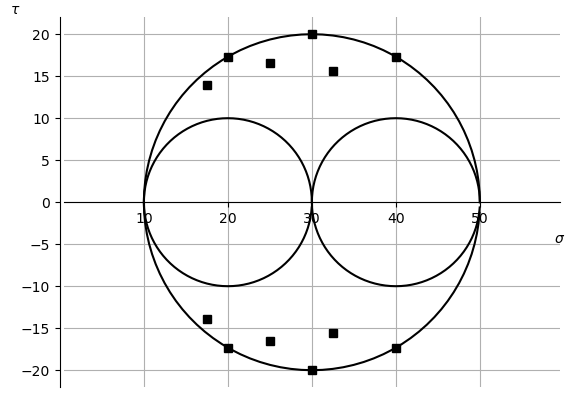

In [8]:
# Import libraries
import numpy as np
pi = np.pi

# Import mohr_circle_stress
from compgeo.mohr_circle_stress import mohr_circle_stress


# Stress tensor in principal stress coordinate system
stress = np.array([[50, 0, 0],[ 0, 30, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([90, 0, 90])

# Planes
planes = np.zeros((12,2))

# Strikes in degrees
planes[0:3, 0] = 0
planes[3:6, 0] = 180
planes[6:9, 0] = 45
planes[9:12, 0] = 135

# Dips in degrees
planes[0:12:3, 1] = 30
planes[1:12:3, 1] = 45
planes[2:12:3, 1] = 60

# Convert to radians
planes = planes * pi/180
 
# Plot Mohr circle
ns, ons, fig, ax = mohr_circle_stress(stress,tx1,px1,tx3,planes)

# Print normal and shear tractions
print("Strike","Dip","\u03C3","Trend","Plunge","\u03C4",
      "Trend","Plunge",sep="\t")

# return to degrees
planes = planes * 180/pi
ons = ons * 180/pi

# print
for i in range(0,np.size(planes,0)):
    print(f"{planes[i,0]:.1f}",
          f"{planes[i,1]:.1f}",
          f"{ns[i,0]:.2f}",
          f"{ons[i,0]:.1f}",
          f"{ons[i,1]:.1f}",
          f"{ns[i,1]:.2f}",
          f"{ons[i,2]:.1f}",
          f"{ons[i,3]:.1f}",
          sep="\t")

N-S planes parallel to $\sigma_2$ plot on the $\sigma_1$-$\sigma_3$ circle. Planes dipping east show positive, anticlockwise shear, while planes dipping west show negative, clockwise shear. Another way to visualize this is using the pole to planes, $O_P$. With $\sigma_1$ horizontal and $\sigma_3$ vertical, $O_P$ is at $\sigma_1$ ({numref}`Figure %s <ch07_fig05>`). From $O_P$ you can trace N-S planes of any dip to the E or W, and verify that E dipping planes have anticlockwise shear, while W dipping planes have clockwise shear. Planes non-parallel to $\sigma_2$ are more difficult to visualize. On the NE planes dipping to the SE the shear tractions are clockwise, while on the SE planes dipping to the SW the shear tractions are anticlockwise. These planes plot inside the $\sigma_1$-$\sigma_3$ circle but outside the $\sigma_2$-$\sigma_3$ and $\sigma_1$-$\sigma_2$ circles (in fact no plane will plot inside these internal circles).

(ch07-5)=
## Exercises

1. This is exercise 6 in chapter 6 of Allmendinger et al. (2012): In the Oseberg field, North Sea, the principal stresses are oriented $\sigma_1$ = 080/00, $\sigma_2$ = 000/90, and $\sigma_3$ = 170/00. If at 2 km depth, $\sigma_1$ = 50 MPa, $\sigma_2$ = 40 MPa, and $\sigma_3$ = 30 MPa, what are the normal and shear tractions on a plane oriented 040/65 (RHR)?

:::{hint}
Use function `shear_on_plane`.
:::

2. Morris and Ferrill (2009) discuss the importance of the intermediate principal stress, $\sigma_2$, for faulting. Let’s look at their first example: The maximum and minimum principal stresses are 95 MPa and 25 MPa, respectively. $\sigma_1$ is vertical and $\sigma_3$ is horizontal and trends E-W. Compute the normal and maximum shear tractions acting on three planes with orientation (RHR) 180/45, 090/45 and 135/45, and for principal stress ratios, $R$, between 0 and 1. Display your results graphically in a lower hemisphere equal area stereonet showing the maximum shear directions on the planes, and a graph of $R$ versus the normal and maximum shear tractions. How do these tractions vary with $R$ on the N-S and E-W planes? How do they vary on the SE-NW plane?

:::{hint}
This problem is similar to the notebook [ch7-2](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch7-2.ipynb). Modify the notebook for the new stress and the three planes. Use different colors for the planes.
:::

3. The slip tendency is the ratio of the maximum shear traction to the normal traction on a plane ($S_t=\tau/\sigma$). It is a proxy for the tendency of a surface to undergo slip under a given stress field (Morris et al., 1996). Write a Python function that for a given stress tensor and stress coordinate system, plots a lower hemisphere equal area stereonet and a Mohr circle colored by slip tendency. The function should work as follows:

    `slip_tendency(stress,tx1,px1,tx3)`

    where `stress` is the stress tensor, `tx1` and `px1` are the trend and plunge of $\mathbf{X_1}$, and `tx3` is the trend of $\mathbf{X_3}$. Use the function to graph the slip tendency for the stress tensor in the notebook [ch7-3](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch7-3.ipynb). {numref}`Figure %s <ch07_fig08>` shows how the output of the function should look like. Based on your results, at which dip angle would you expect the N-S to slip? Will planes with the maximum possible shear traction ($\sigma_1-\sigma_3$) slip?

    ```{figure} /figures/ch07_fig08.png
    :width: 600px
    :name: ch07_fig08

    Slip tendency for the stress tnesor in the notebook [[ch7-3]]. Left is lower hemisphere equal area stereonet, and right is Mohr circle. Figure made with the program [[`GeoKalk`]] by Nestor Cardozo.
    ```

    :::{hint}
	Use the function `mohr_circle_stress` as the base of your new function. In the new function, calculate the normal and shear tractions on a set of planes varying in strike from 0 to 360and dip from 0 to 90. A 1increment in strike and dip is sufficient. Plot each pole colored by slip tendency on a stereonet and a Mohr circle. Use a color scale bar similar to {numref}`Figure %s <ch07_fig08>`. Since you will be handling about 30,000 planes and since the direction and sense of the maximum shear traction in this case are not relevant, you can consider calculating the normal and maximum shear tractions using Eq. {eq}`ch07_eq06`.
	:::

(ch07-6)=
## References

Allmendinger, R.W., Cardozo, N. and Fisher, D.M. 2012. Structural
Geology Algorithms: Vectors and Tensors. Cambridge University Press.

Gephart, J.W. 1990. Stress and the direction of slip on fault planes.
Tectonics 9, 845-858.

Marshak, S. and Mitra, G. 1988. Basic Methods of Structural Geology.
Prentice Hall.

Morris, A.P., Ferrill, D.A. and Henderson, D.B. 1996. Slip-tendency
analysis and fault reactivation. Geology 24, 275-278.

Morris, A.P. and Ferrill, D.A. 2009. The importance of the effective
intermediate principal stress ($\sigma'_2$) to fault slip patterns.
Journal of Structural Geology 31, 950-959.

Ragan, D.M. 2009. Structural Geology: An Introduction to Geometrical
Techniques. Cambridge University Press.

Ramsay, J.G. 1967. Folding and Fracturing of Rocks. McGraw-Hill, New
York.